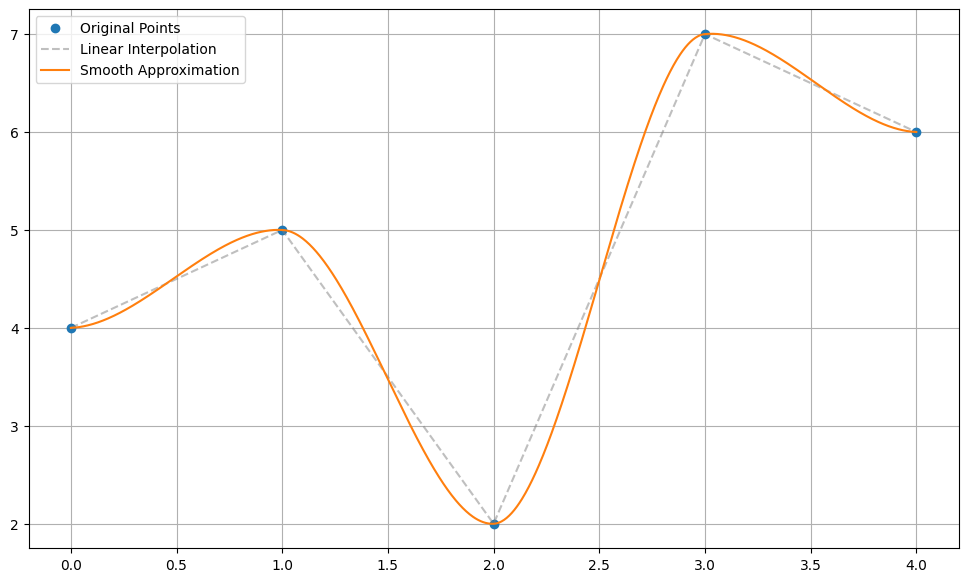

Value at x = 1.5: 3.475
Derivative at x = 1.5: -4.5


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

def create_smooth_linear_curve(points, smoothness=0.1, num_interpolated_points=1000):
    """
    Creates a smooth, continuous function that closely resembles linear interpolation.
    Uses cubic Hermite splines with controlled tangents to approximate linear behavior.
    """
    # Convert input points to x and y arrays
    if isinstance(points[0], tuple):
        x_points = np.array([p[0] for p in points], dtype=np.float64)
        y_points = np.array([p[1] for p in points], dtype=np.float64)
    else:
        x_points = np.array(points[0], dtype=np.float64)
        y_points = np.array(points[1], dtype=np.float64)
    
    # Sort points by x-coordinate
    sort_idx = np.argsort(x_points)
    x_points = x_points[sort_idx]
    y_points = y_points[sort_idx]
    
    # Calculate slopes between points
    dx = np.diff(x_points)
    dy = np.diff(y_points)
    slopes = dy / dx
    
    # Calculate tangents at each point
    # Initialize tangents array as float64
    tangents = np.zeros_like(x_points, dtype=np.float64)
    tangents[0] = slopes[0]
    tangents[-1] = slopes[-1]
    
    for i in range(1, len(x_points) - 1):
        # Weighted average of adjacent slopes
        tangents[i] = (slopes[i-1] + slopes[i]) / 2
    
    # Scale tangents to control smoothness
    tangents *= smoothness
    
    # Create the smooth spline
    cs = CubicHermiteSpline(x_points, y_points, tangents)
    
    # Generate smooth points for plotting
    x_smooth = np.linspace(x_points.min(), x_points.max(), num_interpolated_points)
    y_smooth = cs(x_smooth)
    
    return x_smooth, y_smooth, cs

def plot_comparison_with_linear(points, x_smooth, y_smooth):
    """
    Plots original points, linear interpolation, and the smoothed curve.
    """
    if isinstance(points[0], tuple):
        x_points = [p[0] for p in points]
        y_points = [p[1] for p in points]
    else:
        x_points, y_points = points
    
    plt.figure(figsize=(12, 7))
    
    # Plot original points
    plt.plot(x_points, y_points, 'o', label='Original Points')
    
    # Plot linear interpolation
    plt.plot(x_points, y_points, '--', color='gray', alpha=0.5, label='Linear Interpolation')
    
    # Plot smooth curve
    plt.plot(x_smooth, y_smooth, '-', label='Smooth Approximation')
    
    plt.legend()
    plt.savefig("smooth.png")
    plt.grid(True)
    plt.show()

# Example usage:
if __name__ == "__main__":
    points = [(0, 4), (1, 5), (2, 2), (3, 7), (4, 6)]
    
    # Create smooth curve that resembles linear interpolation
    x_smooth, y_smooth, spline_func = create_smooth_linear_curve(points, smoothness=0.1)
    
    # Plot the results
    plot_comparison_with_linear(points, x_smooth, y_smooth)
    
    # Example of evaluating and differentiating the spline
    x_new = 1.5
    y_new = spline_func(x_new)
    derivative = spline_func.derivative()(x_new)
    print(f"Value at x = {x_new}: {y_new}")
    print(f"Derivative at x = {x_new}: {derivative}")